# Final Task - Home Credit Indonesia

By : Vicky Jodie

### Problem statement: 
- The loss generated by non-paying customers is quite high. 

### Objective:
1. The Data Science team can help minimize these losses by using predictive models to predict customers who are likely to default.
2. Customers who are unable to pay will have their loan applications denied.

## Import Library

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 500)

## Define dataset

In [3]:
df_1 = pd.read_csv('application_train.csv')

In [4]:
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

There are some data not complete on dataset, need to do feature extraction, joining other dataset, and do some other approach

## Data Understanding & Exploratory Data Analysis

### Application every year

In [5]:
df_1['DATE_REGISTRATION'] = pd.to_datetime("today") + pd.to_timedelta(df_1['DAYS_REGISTRATION'], unit = 'D')
df_1['YEAR_REGISTRATION'] = pd.DatetimeIndex(df_1['DATE_REGISTRATION']).year
df_1['MONTH_REGISTRATION'] = pd.DatetimeIndex(df_1['DATE_REGISTRATION']).month
df_1['DAY_REGISTRATION']= pd.DatetimeIndex(df_1['DATE_REGISTRATION']).day

In [6]:
df_1 = df_1.drop(['DATE_REGISTRATION'], axis = 1)

In [7]:
print(f'''Max Application (Year) :''')
print(df_1['YEAR_REGISTRATION'].max())
print('')
print(f'''Value Counts Year :''')
print(df_1['YEAR_REGISTRATION'].value_counts())

Max Application (Year) :
2022

Value Counts Year :
2020    15635
2021    15585
2019    13633
2009    12758
2010    12738
2011    12116
2018    11885
2014    11635
2015    11418
2008    11332
2013    10753
2016    10549
2017    10518
2022    10368
2012    10254
2007     9043
2005     8726
2006     8451
2004     8125
2003     8064
2002     7862
2000     7691
2001     7279
1999     7115
1998     7077
1997     6624
1996     6055
1995     5469
1994     4690
1993     3705
1992     3154
1991     2686
1990     2357
1989     2241
1988     2007
1987     1781
1986     1491
1985     1187
1984      886
1983      650
1982      490
1981      387
1980      292
1979      215
1978      156
1977      106
1976       68
1975       54
1974       33
1973       28
1972       21
1971       11
1969       10
1970       10
1966        8
1965        6
1968        6
1964        3
1962        3
1967        3
1961        2
1960        2
1957        1
1955        1
1958        1
1959        1
Name: YEAR_REGISTRATION, 

In [8]:
df_0grouped = df_1.groupby(['YEAR_REGISTRATION']).agg({'AMT_CREDIT' : ['mean']})
df_0grouped = df_0grouped.reset_index()
df_0grouped.describe()

,YEAR_REGISTRATION,AMT_CREDIT
,,mean
count,66.000000,6.600000e+01
mean,1989.378788,5.957777e+05
std,19.390533,1.273379e+05
min,1955.000000,2.398500e+05
25%,1973.250000,5.578448e+05
50%,1989.500000,5.952930e+05
75%,2005.750000,6.098506e+05
max,2022.000000,1.305909e+06


In [9]:
df_0grouped

,YEAR_REGISTRATION,AMT_CREDIT
,,mean
0,1955,2.398500e+05
1,1957,6.544980e+05
2,1958,8.086500e+05
3,1959,1.305909e+06
4,1960,7.987500e+05
5,1961,5.588415e+05
6,1962,8.580945e+05
7,1964,8.170485e+05
8,1965,4.711485e+05


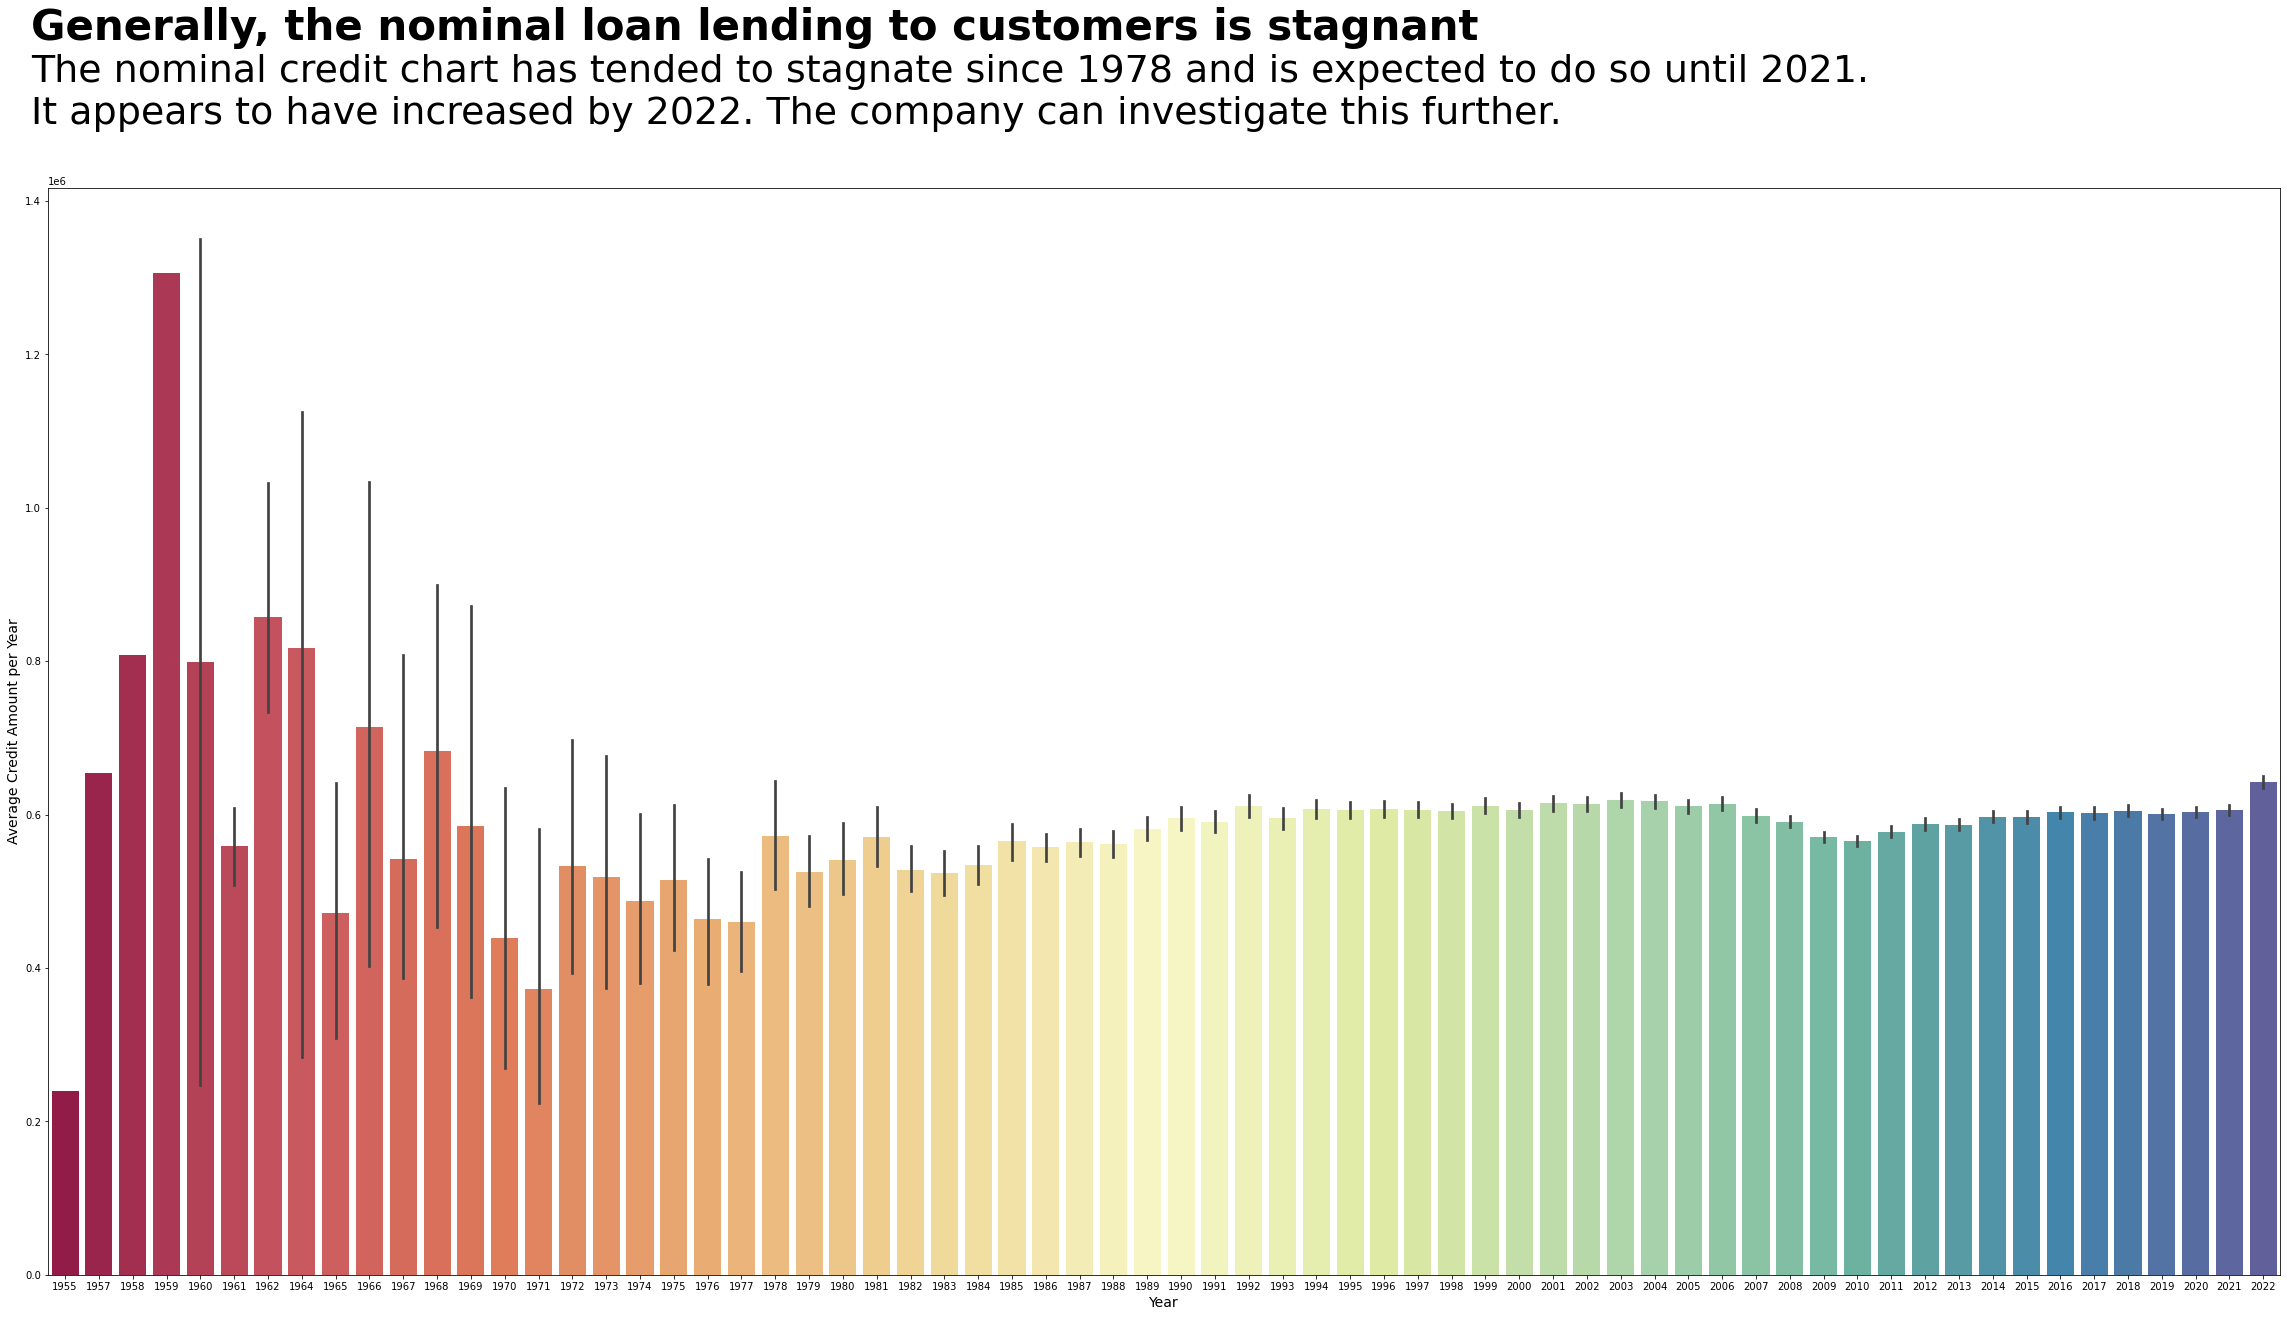

In [10]:
plt.figure(figsize=(40,20))
sns.barplot(x='YEAR_REGISTRATION',y='AMT_CREDIT', data=df_1, palette='Spectral')

plt.text(x= -1, y=1609999, s="Generally, the nominal loan lending to customers is stagnant", 
         fontsize=42, fontweight='bold')
plt.text(x= -1, y=1500799, s="The nominal credit chart has tended to stagnate since 1978 and is expected to do so until 2021. \nIt appears to have increased by 2022. The company can investigate this further.", 
         fontsize=38)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Credit Amount per Year', fontsize=14)
plt.savefig('year.png')

In [11]:
import decimal

### Loan Count every Year

In [12]:
df_7grouped = df_1.groupby(['YEAR_REGISTRATION','TARGET']).agg({'SK_ID_CURR' : ['nunique']})
df_7grouped = df_7grouped.reset_index()
df_7grouped.columns = ['YEAR REGISTRATION','TARGET STATUS','TOTAL LOANERS']
df_7grouped['RATIO'] = (df_7grouped['TOTAL LOANERS'])/len(df_1)*100
df_7grouped['RATIO ROUNDED'] = df_7grouped['RATIO'].apply(lambda x: round(x, 1))
df_7grouped

,YEAR REGISTRATION,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,1955,0,1,0.000325,0.0
1,1957,0,1,0.000325,0.0
2,1958,0,1,0.000325,0.0
3,1959,1,1,0.000325,0.0
4,1960,0,2,0.000650,0.0
5,1961,0,2,0.000650,0.0
6,1962,0,3,0.000976,0.0
7,1964,0,3,0.000976,0.0
8,1965,0,6,0.001951,0.0
9,1966,0,8,0.002602,0.0


Text(0, 0.5, 'Average Credit Amount per Year')

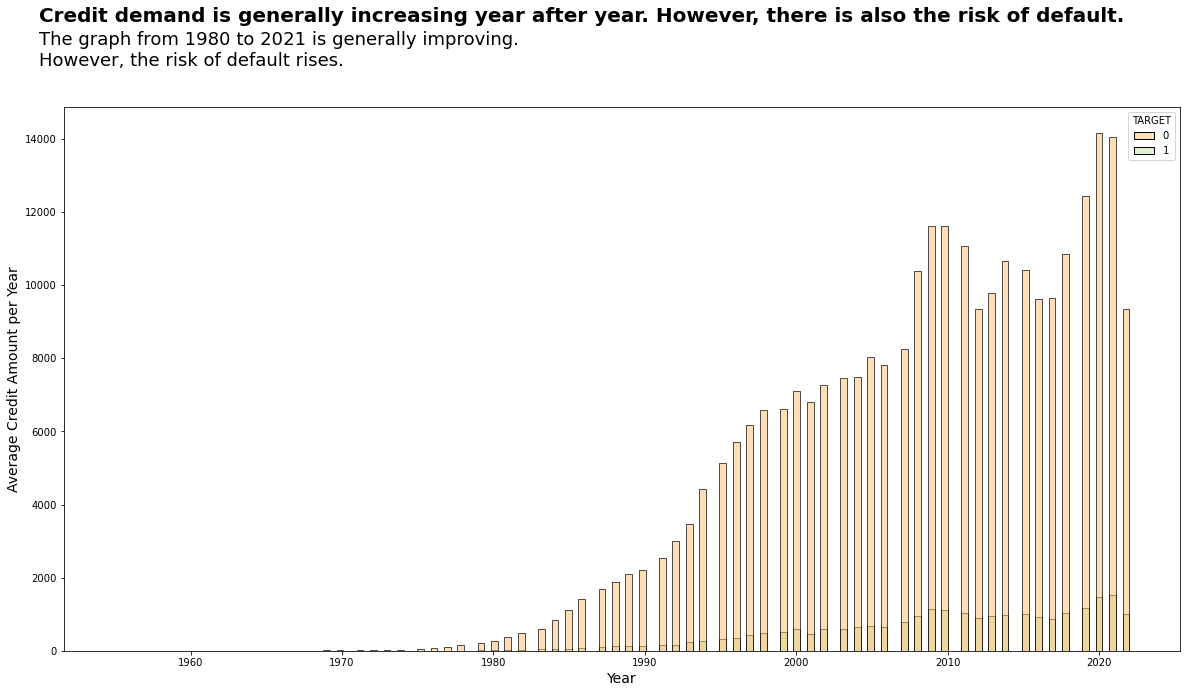

In [13]:
plt.figure(figsize=(20,10))
sns.histplot(x='YEAR_REGISTRATION',hue='TARGET', data=df_1, palette='Spectral')

plt.text(x= 1950, y=17200, s="Credit demand is generally increasing year after year. However, there is also the risk of default.", 
         fontsize=20, fontweight='bold')
plt.text(x= 1950, y=16000, s="The graph from 1980 to 2021 is generally improving. \nHowever, the risk of default rises.", 
         fontsize=18)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Credit Amount per Year', fontsize=14)

### Data Correlation

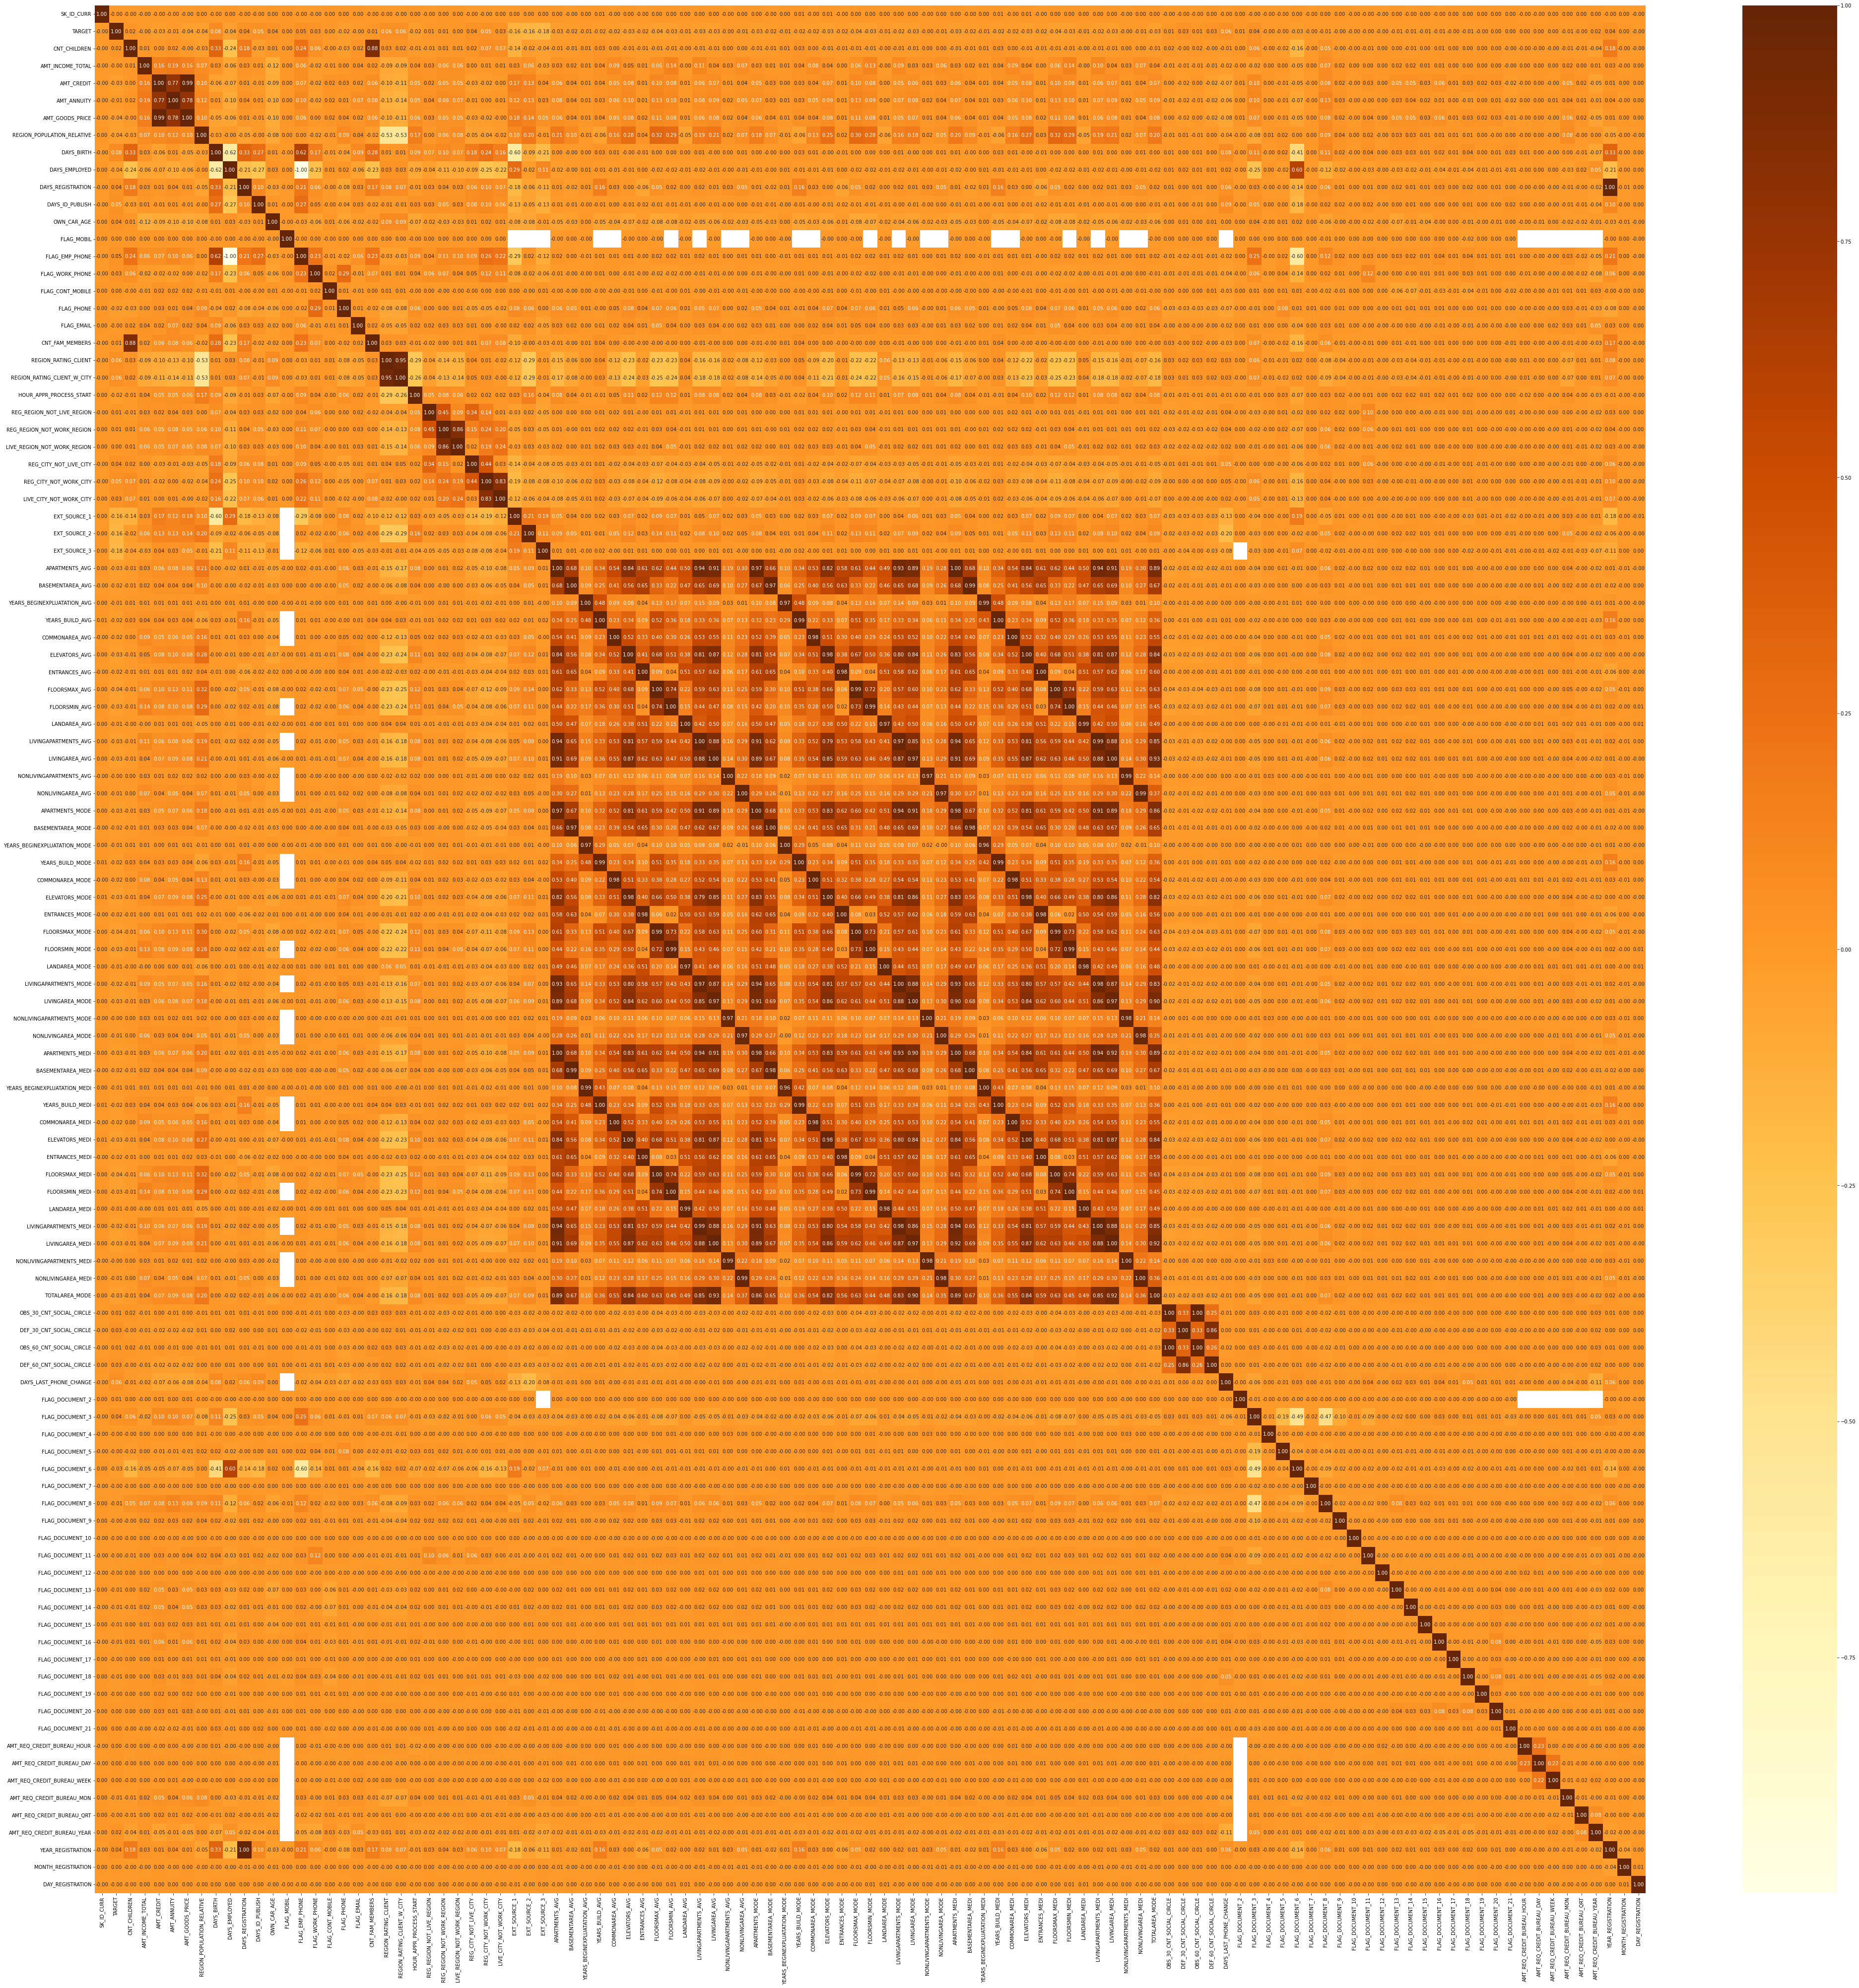

In [14]:
plt.figure(figsize=(70, 70))
sns.heatmap(df_1.corr(), cmap='YlOrBr', annot=True, fmt='.2f')
plt.savefig('corrhci.png')

### Distribution of Potential Default

Text(-1.4, 1.15, "The '1' Label explain Client with payment difficulties \nex: late payment")

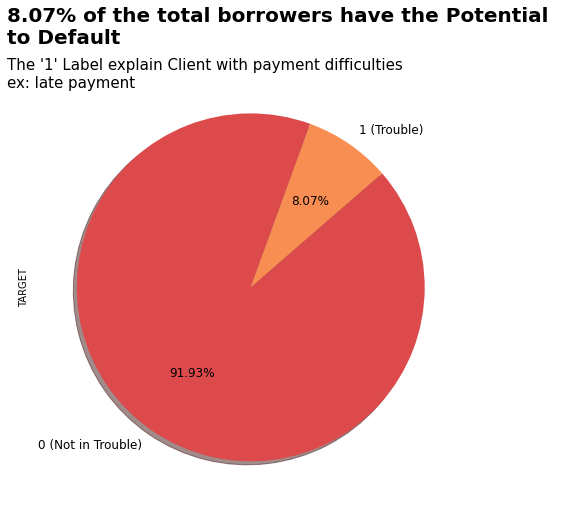

In [15]:
plt.figure(figsize=(16,8))

colors = sns.color_palette("Spectral", 7)
labels ="0 (Not in Trouble)", "1 (Trouble)"

df_1["TARGET"].value_counts().plot.pie(autopct='%1.2f%%', shadow=True,labels = labels ,colors=colors, fontsize=12, startangle=70)

plt.text(x=-1.4, y=1.4, s="8.07% of the total borrowers have the Potential \nto Default", 
         fontsize=20, fontweight='bold')
plt.text(x=-1.4, y=1.15, s="The '1' Label explain Client with payment difficulties \nex: late payment", 
         fontsize=15)

### Age of Loaners vs Loaner Condition (Target)

In [16]:
df_1['AGE'] = df_1['DAYS_BIRTH']/-360
decimals = 0
df_1['AGE'] = df_1['AGE'].apply(lambda x: round(x, decimals))

print(f'''Min value Age Column:''')
print(df_1['AGE'].min())

print(f'''Max value Age Column:''')
print(df_1['AGE'].max())

print(f'''Value count Age Column:''')
print(df_1['AGE'].value_counts())

Min value Age Column:
21.0
Max value Age Column:
70.0
Value count Age Column:
38.0    8722
40.0    8714
39.0    8697
41.0    8486
37.0    8474
28.0    8419
42.0    8352
32.0    8335
44.0    8228
43.0    8131
29.0    7839
33.0    7777
36.0    7694
45.0    7667
31.0    7648
34.0    7622
30.0    7579
35.0    7536
55.0    7360
46.0    7220
54.0    7219
47.0    7215
48.0    6982
56.0    6853
58.0    6840
49.0    6834
57.0    6648
53.0    6598
50.0    6578
52.0    6497
51.0    6487
60.0    6480
61.0    6386
59.0    6133
62.0    5671
64.0    5378
63.0    5272
27.0    4916
65.0    4890
26.0    4122
66.0    4049
25.0    3907
24.0    3877
23.0    3289
67.0    2520
68.0    1835
69.0    1570
22.0    1467
70.0     268
21.0     230
Name: AGE, dtype: int64


In [17]:
def age_category(age):
    if age < 20:
        return 'Late Ten'
    elif age >= 20 and age < 30:
        return 'Twenty'
    elif age >= 30 and age < 40:
        return 'Thirty'
    elif age >= 40 and age < 50:
        return 'Fourty'
    elif age >= 50 and age < 60:
        return 'Fifty'
    else:
        return 'Above Sixty'

df_1['AGE_CATEGORY'] = df_1['AGE'].apply(age_category)

In [18]:
print(f'''Min value Age Category Column:''')
print(df_1['AGE_CATEGORY'].min())

print(f'''Max value Age Category Column:''')
print(df_1['AGE_CATEGORY'].max())

print(f'''Value count Age Column:''')
print(df_1['AGE_CATEGORY'].value_counts())

Min value Age Category Column:
Above Sixty
Max value Age Category Column:
Twenty
Value count Age Column:
Thirty         80084
Fourty         77829
Fifty          67213
Above Sixty    44319
Twenty         38066
Name: AGE_CATEGORY, dtype: int64


In [19]:
df_1grouped = df_1.groupby(['AGE_CATEGORY','TARGET']).agg({'SK_ID_CURR' : ['nunique']})
df_1grouped = df_1grouped.reset_index()
df_1grouped.columns = ['AGE CATEGORY','TARGET STATUS','TOTAL LOANERS']
df_1grouped['RATIO'] = (df_1grouped['TOTAL LOANERS'])/len(df_1)*100
df_1grouped['RATIO ROUNDED'] = df_1grouped['RATIO'].apply(lambda x: round(x, 1))
df_1grouped

,AGE CATEGORY,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,Above Sixty,0,42077,13.683088,13.7
1,Above Sixty,1,2242,0.729080,0.7
2,Fifty,0,62954,20.472113,20.5
3,Fifty,1,4259,1.384991,1.4
4,Fourty,0,71789,23.345181,23.3
5,Fourty,1,6040,1.964157,2.0
6,Thirty,0,72171,23.469404,23.5
7,Thirty,1,7913,2.573241,2.6
8,Twenty,0,33695,10.957332,11.0
9,Twenty,1,4371,1.421413,1.4


Text(12.991851851851848, 0.5, '(%) Total Loaners')

<Figure size 1440x864 with 0 Axes>

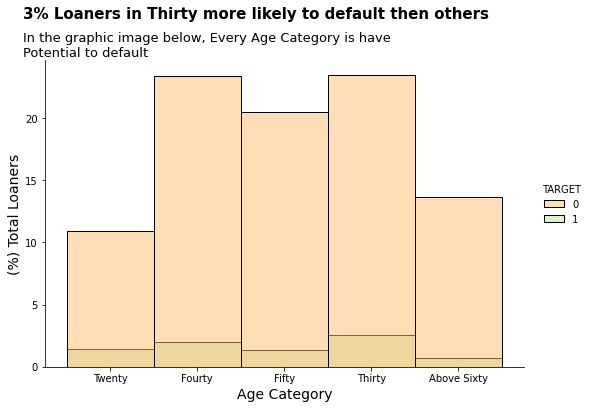

In [20]:
plt.figure(figsize=(20,12))
sns.displot(x='AGE_CATEGORY', hue='TARGET', data=df_1, palette='Spectral', stat = 'percent',height=5, aspect=1.5)

plt.text(x= -1, y=28, s="3% Loaners in Thirty more likely to default then others", 
         fontsize=15, fontweight='bold')
plt.text(x=-1, y=25, s="In the graphic image below, Every Age Category is have\nPotential to default", 
         fontsize=13)

plt.xlabel('Age Category', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)

### Income Category with Loaner Condition (Target)

In [21]:
df_1['AMT_INCOME_TOTAL'].min()

25650.0

In [22]:
df_1['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

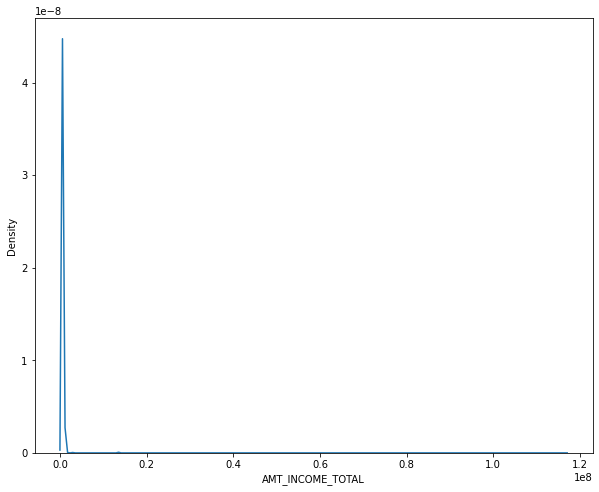

In [23]:
plt.figure(figsize=(10,8))
sns.kdeplot(x='AMT_INCOME_TOTAL', data=df_1, palette='viridis')

In [24]:
def income_category(income):
    if income < 112500:
        return 'Low Income'
    elif income >= 112500 and income < 202500:
        return 'Mid Income'
    else:
        return 'High Income'

df_1['AMT_INCOME_CAT'] = df_1['AMT_INCOME_TOTAL'].apply(income_category)

In [25]:
df_1['AMT_INCOME_CAT'].value_counts()

Mid Income     150073
High Income     87879
Low Income      69559
Name: AMT_INCOME_CAT, dtype: int64

In [26]:
df_2grouped = df_1.groupby(['AMT_INCOME_CAT','TARGET']).agg({'SK_ID_CURR' : ['nunique']})
df_2grouped = df_2grouped.reset_index()
df_2grouped.columns = ['INCOME CATEGORY','TARGET STATUS','TOTAL LOANERS']
df_2grouped['RATIO'] = (df_2grouped['TOTAL LOANERS'])/len(df_1)*100
df_2grouped['RATIO ROUNDED'] = df_2grouped['RATIO'].apply(lambda x: round(x, decimals))
df_2grouped

,INCOME CATEGORY,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,High Income,0,81609,26.538563,27.0
1,High Income,1,6270,2.038951,2.0
2,Low Income,0,63836,20.758932,21.0
3,Low Income,1,5723,1.861072,2.0
4,Mid Income,0,137241,44.629623,45.0
5,Mid Income,1,12832,4.172859,4.0


Text(12.991851851851848, 0.5, '(%) Total Loaners')

<Figure size 1440x864 with 0 Axes>

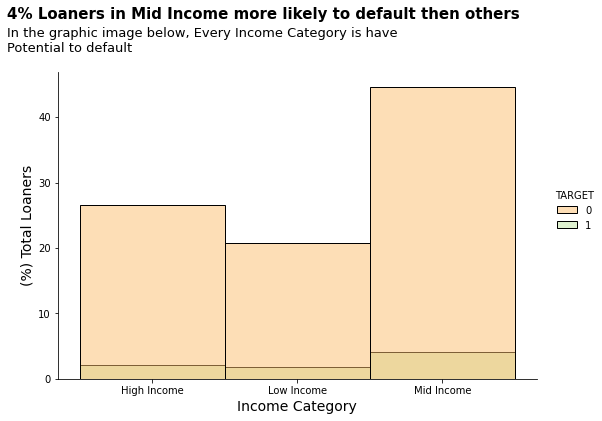

In [27]:
plt.figure(figsize=(20,12))
sns.displot(x='AMT_INCOME_CAT', hue='TARGET', data=df_1, palette='Spectral', stat = 'percent',height=5, aspect=1.5)

plt.text(x= -1, y=55, s="4% Loaners in Mid Income more likely to default then others", 
         fontsize=15, fontweight='bold')
plt.text(x=-1, y=50, s="In the graphic image below, Every Income Category is have\nPotential to default", 
         fontsize=13)

plt.xlabel('Income Category', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)

### Job Type with Loaner Condition (Target)

In [28]:
df_1['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [29]:
df_3grouped = df_1.groupby(['NAME_INCOME_TYPE','TARGET']).agg({'SK_ID_CURR' : ['nunique']})
df_3grouped = df_3grouped.reset_index()
df_3grouped.columns = ['JOB CATEGORY','TARGET STATUS','TOTAL LOANERS']
df_3grouped['RATIO'] = (df_3grouped['TOTAL LOANERS'])/len(df_1)*100
df_3grouped['RATIO ROUNDED'] = df_3grouped['RATIO'].apply(lambda x: round(x, decimals))
df_3grouped

,JOB CATEGORY,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,Businessman,0,10,0.003252,0.0
1,Commercial associate,0,66257,21.546221,22.0
2,Commercial associate,1,5360,1.743027,2.0
3,Maternity leave,0,3,0.000976,0.0
4,Maternity leave,1,2,0.000650,0.0
5,Pensioner,0,52380,17.033537,17.0
6,Pensioner,1,2982,0.969721,1.0
7,State servant,0,20454,6.651469,7.0
8,State servant,1,1249,0.406164,0.0
9,Student,0,18,0.005853,0.0


Text(11.520925925925916, 0.5, '(%) Total Loaners')

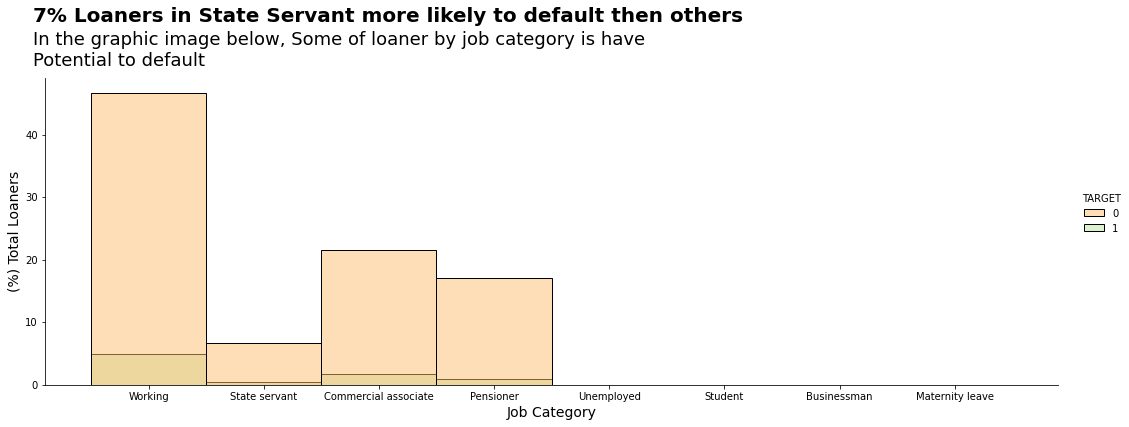

In [30]:
sns.displot(x='NAME_INCOME_TYPE', hue='TARGET', data=df_1, palette='Spectral', stat = 'percent', height=5, aspect=3)

plt.text(x= -1, y=58, s="7% Loaners in State Servant more likely to default then others", 
         fontsize=20, fontweight='bold')
plt.text(x= -1, y=51, s="In the graphic image below, Some of loaner by job category is have\nPotential to default", 
         fontsize=18)

plt.xlabel('Job Category', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)

### Education Type with Loaner Condition (Target)

In [31]:
df_1['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [32]:
df_4grouped = df_1.groupby(['NAME_EDUCATION_TYPE','TARGET']).agg({'SK_ID_CURR' : ['nunique']})
df_4grouped = df_4grouped.reset_index()
df_4grouped.columns = ['EDUCATION CATEGORY','TARGET STATUS','TOTAL LOANERS']
df_4grouped['RATIO'] = (df_4grouped['TOTAL LOANERS'])/len(df_1)*100
df_4grouped['RATIO ROUNDED'] = df_4grouped['RATIO'].apply(lambda x: round(x, decimals))
df_4grouped

,EDUCATION CATEGORY,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,Academic degree,0,161,0.052356,0.0
1,Academic degree,1,3,0.000976,0.0
2,Higher education,0,70854,23.041127,23.0
3,Higher education,1,4009,1.303693,1.0
4,Incomplete higher,0,9405,3.058427,3.0
5,Incomplete higher,1,872,0.283567,0.0
6,Lower secondary,0,3399,1.105326,1.0
7,Lower secondary,1,417,0.135605,0.0
8,Secondary / secondary special,0,198867,64.669882,65.0
9,Secondary / secondary special,1,19524,6.349041,6.0


Text(11.815111111111115, 0.5, '(%) Total Loaners')

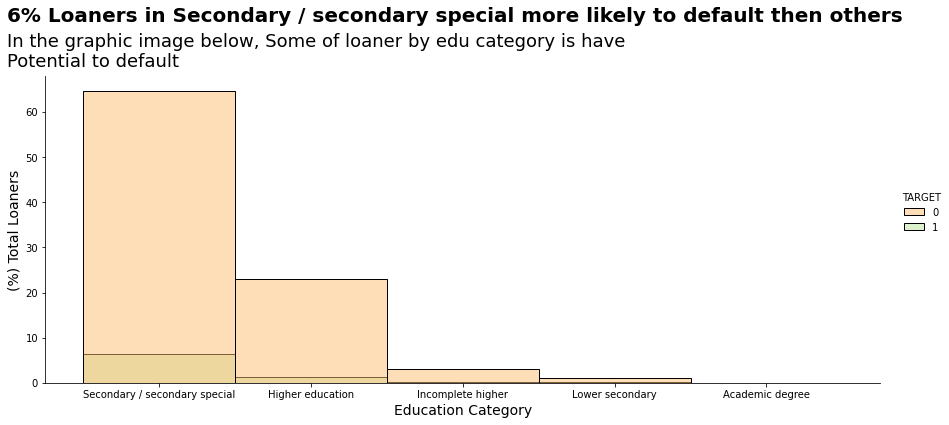

In [33]:
sns.displot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=df_1, palette='Spectral', stat = 'percent', height=5, aspect=2.5)

plt.text(x= -1, y=80, s="6% Loaners in Secondary / secondary special more likely to default then others", 
         fontsize=20, fontweight='bold')
plt.text(x= -1, y=70, s="In the graphic image below, Some of loaner by edu category is have\nPotential to default", 
         fontsize=18)

plt.xlabel('Education Category', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)

### Family Status with Loaner Condition (Target)

In [34]:
df_1['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [35]:
df_5grouped = df_1.groupby(['NAME_FAMILY_STATUS','TARGET']).agg({'SK_ID_CURR' : ['nunique']})
df_5grouped = df_5grouped.reset_index()
df_5grouped.columns = ['FAMILY STATUS','TARGET STATUS','TOTAL LOANERS']
df_5grouped['RATIO'] = (df_5grouped['TOTAL LOANERS'])/len(df_1)*100
df_5grouped['RATIO ROUNDED'] = df_5grouped['RATIO'].apply(lambda x: round(x, decimals))
df_5grouped

,FAMILY STATUS,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,Civil marriage,0,26814,8.719688,9.0
1,Civil marriage,1,2961,0.962892,1.0
2,Married,0,181582,59.048945,59.0
3,Married,1,14850,4.829096,5.0
4,Separated,0,18150,5.902228,6.0
5,Separated,1,1620,0.526810,1.0
6,Single / not married,0,40987,13.328629,13.0
7,Single / not married,1,4457,1.449379,1.0
8,Unknown,0,2,0.000650,0.0
9,Widow,0,15151,4.926978,5.0


Text(11.815111111111115, 0.5, '(%) Total Loaners')

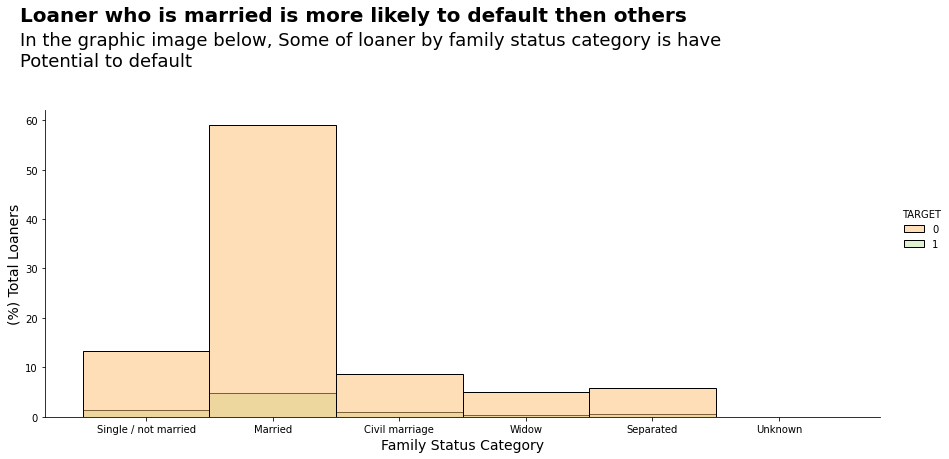

In [36]:
sns.displot(x='NAME_FAMILY_STATUS', hue='TARGET', data=df_1, palette='Spectral', stat = 'percent', height=5, aspect=2.5)

plt.text(x= -1, y=80, s="Loaner who is married is more likely to default then others", 
         fontsize=20, fontweight='bold')
plt.text(x= -1, y=71, s="In the graphic image below, Some of loaner by family status category is have\nPotential to default", 
         fontsize=18)

plt.xlabel('Family Status Category', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)

### House Type with Loaner Condition (Target)

In [37]:
df_1['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [38]:
df_6grouped = df_1.groupby(['NAME_HOUSING_TYPE','TARGET']).agg({'SK_ID_CURR' : ['nunique']})
df_6grouped = df_6grouped.reset_index()
df_6grouped.columns = ['HOUSE TYPE','TARGET STATUS','TOTAL LOANERS']
df_6grouped['RATIO'] = (df_6grouped['TOTAL LOANERS'])/len(df_1)*100
df_6grouped['RATIO ROUNDED'] = df_6grouped['RATIO'].apply(lambda x: round(x, decimals))
df_6grouped

,HOUSE TYPE,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,Co-op apartment,0,1033,0.335923,0.0
1,Co-op apartment,1,89,0.028942,0.0
2,House / apartment,0,251596,81.816911,82.0
3,House / apartment,1,21272,6.917476,7.0
4,Municipal apartment,0,10228,3.326060,3.0
5,Municipal apartment,1,955,0.310558,0.0
6,Office apartment,0,2445,0.795094,1.0
7,Office apartment,1,172,0.055933,0.0
8,Rented apartment,0,4280,1.391820,1.0
9,Rented apartment,1,601,0.195440,0.0


Text(11.888657407407415, 0.5, '(%) Total Loaners')

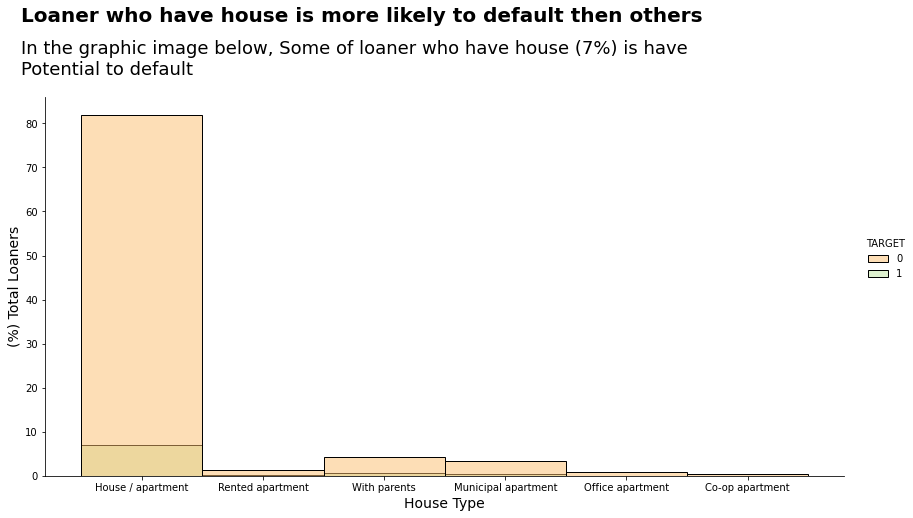

In [39]:
sns.displot(x='NAME_HOUSING_TYPE', hue='TARGET', data=df_1, palette='Spectral', stat = 'percent', height=6, aspect=2)

plt.text(x= -1, y=103, s="Loaner who have house is more likely to default then others", 
         fontsize=20, fontweight='bold')
plt.text(x= -1, y=91, s="In the graphic image below, Some of loaner who have house (7%) is have\nPotential to default", 
         fontsize=18)

plt.xlabel('House Type', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)

### Region Customers Rating with Target

In [40]:
df_1['REGION_RATING_CLIENT_W_CITY'].value_counts()

2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [41]:
df_8grouped = df_1.groupby(['REGION_RATING_CLIENT_W_CITY','TARGET']).agg({'SK_ID_CURR' : ['nunique']})
df_8grouped = df_8grouped.reset_index()
df_8grouped.columns = ['REGION RATING','TARGET STATUS','TOTAL LOANERS']
df_8grouped['RATIO'] = (df_8grouped['TOTAL LOANERS'])/len(df_1)*100
df_8grouped['RATIO ROUNDED'] = df_8grouped['RATIO'].apply(lambda x: round(x, decimals))
df_8grouped

,REGION RATING,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,1,0,32513,10.572955,11.0
1,1,1,1654,0.537867,1.0
2,2,0,211314,68.717542,69.0
3,2,1,18170,5.908732,6.0
4,3,0,38859,12.636621,13.0
5,3,1,5001,1.626283,2.0


Text(11.888657407407415, 0.5, '(%) Total Loaners')

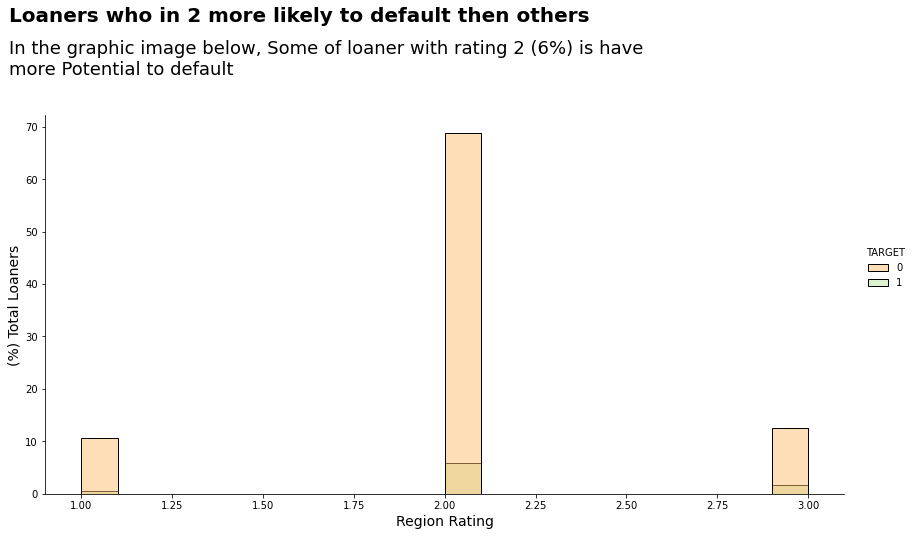

In [42]:
sns.displot(x='REGION_RATING_CLIENT_W_CITY', hue='TARGET', data=df_1, palette='Spectral', stat = 'percent', height=6, aspect=2)

plt.text(x= 0.8, y=90, s="Loaners who in 2 more likely to default then others", 
         fontsize=20, fontweight='bold')
plt.text(x= 0.8, y=80, s="In the graphic image below, Some of loaner with rating 2 (6%) is have\nmore Potential to default", 
         fontsize=18)

plt.xlabel('Region Rating', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)

### Last Phone Change

In [43]:
df_1['DAYS_LAST_PHONE_CHANGE'].value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [44]:
df_1['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [45]:
df_1['DAYS_LAST_PHONE_CHANGE_FIXED'] = df_1['DAYS_LAST_PHONE_CHANGE']/-360
decimals = 0
df_1['DAYS_LAST_PHONE_CHANGE_FIXED'] = df_1['DAYS_LAST_PHONE_CHANGE_FIXED'].apply(lambda x: round(x, decimals))
df_1['DAYS_LAST_PHONE_CHANGE_FIXED'].value_counts()

-0.0     63910
 1.0     57937
 2.0     48294
 4.0     34053
 3.0     32061
 5.0     31555
 6.0     16871
 7.0     13138
 8.0      5628
 9.0      3323
 10.0      645
 11.0       91
 12.0        4
Name: DAYS_LAST_PHONE_CHANGE_FIXED, dtype: int64

In [46]:
df_1['DAYS_LAST_PHONE_CHANGE_FIXED'].replace([-0.0], [0.0], inplace=True)

In [47]:
df_1['DAYS_LAST_PHONE_CHANGE_FIXED'].value_counts()

0.0     63910
1.0     57937
2.0     48294
4.0     34053
3.0     32061
5.0     31555
6.0     16871
7.0     13138
8.0      5628
9.0      3323
10.0      645
11.0       91
12.0        4
Name: DAYS_LAST_PHONE_CHANGE_FIXED, dtype: int64

In [48]:
def days_last_phone_change (phone):
    if phone == 0:
        return 'Never'
    elif phone >= 1 and phone <= 3:
        return 'Ever'
    else:
        return 'Frequent'

df_1['PHONE_CHANGE_CAT'] = df_1['DAYS_LAST_PHONE_CHANGE_FIXED'].apply(days_last_phone_change)

In [49]:
df_1['PHONE_CHANGE_CAT'].value_counts()

Ever        138292
Frequent    105309
Never        63910
Name: PHONE_CHANGE_CAT, dtype: int64

In [50]:
df_9grouped = df_1.groupby(['PHONE_CHANGE_CAT','TARGET']).agg({'SK_ID_CURR' : ['nunique']})
df_9grouped = df_9grouped.reset_index()
df_9grouped.columns = ['PHONE CHANGE CATEGORY','TARGET STATUS','TOTAL LOANERS']
df_9grouped['RATIO'] = (df_9grouped['TOTAL LOANERS'])/len(df_1)*100
df_9grouped['RATIO ROUNDED'] = df_9grouped['RATIO'].apply(lambda x: round(x, decimals))
df_9grouped

,PHONE CHANGE CATEGORY,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,Ever,0,125927,40.950405,41.0
1,Ever,1,12365,4.020994,4.0
2,Frequent,0,98880,32.154947,32.0
3,Frequent,1,6429,2.090657,2.0
4,Never,0,57879,18.821766,19.0
5,Never,1,6031,1.961231,2.0


Text(11.888657407407415, 0.5, '(%) Total Loaners')

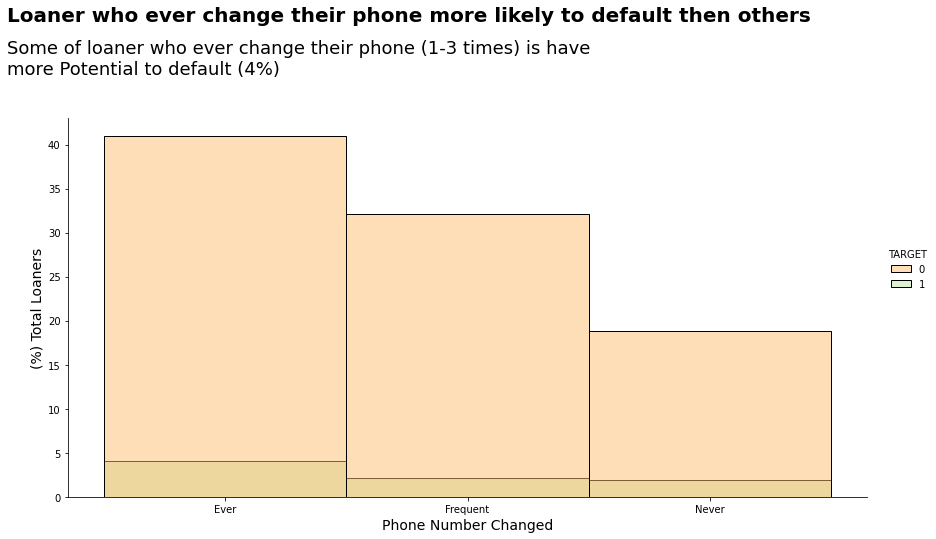

In [51]:
sns.displot(x='PHONE_CHANGE_CAT', hue='TARGET', data=df_1, palette='Spectral', stat = 'percent', height=6, aspect=2)

plt.text(x= -0.9, y=54, s="Loaner who ever change their phone more likely to default then others", 
         fontsize=20, fontweight='bold')
plt.text(x= -0.9, y=48, s="Some of loaner who ever change their phone (1-3 times) is have\nmore Potential to default (4%)", 
         fontsize=18)

plt.xlabel('Phone Number Changed', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)

### Day Publish

In [52]:
df_1['DAYS_ID_PUBLISH'].value_counts()

-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
        ... 
-5896      1
-5921      1
-5753      1
-5960      1
-6211      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64

In [53]:
df_1['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [54]:
df_1['DAYS_ID_PUBLISH_FIXED'] = df_1['DAYS_ID_PUBLISH']/-360
decimals = 0
df_1['DAYS_ID_PUBLISH_FIXED'] = df_1['DAYS_ID_PUBLISH_FIXED'].apply(lambda x: round(x, decimals))
df_1['DAYS_ID_PUBLISH_FIXED'].value_counts()

12.0    42722
13.0    33305
11.0    31171
7.0     19066
8.0     18541
9.0     18509
10.0    17500
3.0     17151
6.0     17106
5.0     16848
2.0     16355
4.0     16280
1.0     14851
14.0    14629
0.0      7786
15.0     3622
16.0     1435
17.0      630
18.0        3
20.0        1
Name: DAYS_ID_PUBLISH_FIXED, dtype: int64

In [55]:
df_1['DAYS_ID_PUBLISH_FIXED'].describe()

count    307511.000000
mean          8.311153
std           4.208343
min           0.000000
25%           5.000000
50%           9.000000
75%          12.000000
max          20.000000
Name: DAYS_ID_PUBLISH_FIXED, dtype: float64

In [56]:
def category_days (days):
    if days >= 1 and days <+ 20:
        return 'Ever Changed'
    else:
        return 'Not Changed'

df_1['DAYS_ID_PUBLISH_CAT'] = df_1['DAYS_ID_PUBLISH_FIXED'].apply(category_days)

In [57]:
df_10grouped = df_1.groupby(['DAYS_ID_PUBLISH_CAT','TARGET']).agg({'SK_ID_CURR' : ['nunique']})
df_10grouped = df_10grouped.reset_index()
df_10grouped.columns = ['DAYS DOC CHANGED','TARGET STATUS','TOTAL LOANERS']
df_10grouped['RATIO'] = (df_10grouped['TOTAL LOANERS'])/len(df_1)*100
df_10grouped['RATIO ROUNDED'] = df_10grouped['RATIO'].apply(lambda x: round(x, decimals))
df_10grouped

,DAYS DOC CHANGED,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,Ever Changed,0,275689,89.651752,90.0
1,Ever Changed,1,24035,7.815981,8.0
2,Not Changed,0,6997,2.275366,2.0
3,Not Changed,1,790,0.256901,0.0


Text(12.256388888888885, 0.5, '(%) Total Loaners')

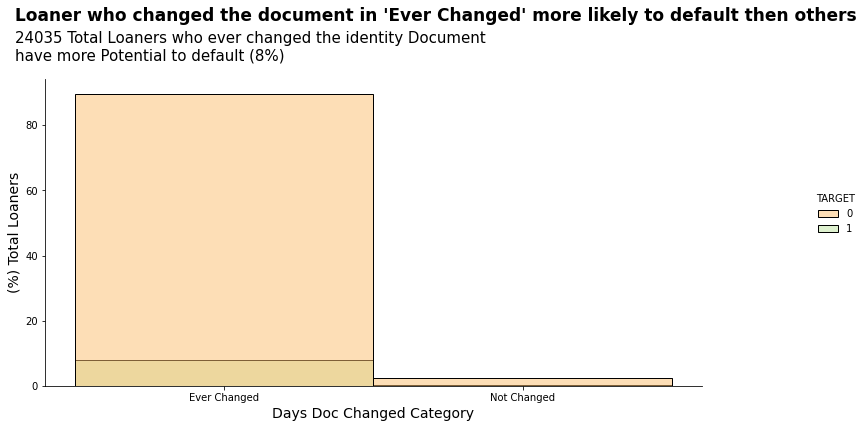

In [58]:
sns.displot(x='DAYS_ID_PUBLISH_CAT', hue='TARGET', data=df_1, palette='Spectral', stat = 'percent', height=5, aspect=2)

plt.text(x= -0.7, y=112, s="Loaner who changed the document in 'Ever Changed' more likely to default then others", 
         fontsize=17, fontweight='bold')
plt.text(x= -0.7, y=100, s="24035 Total Loaners who ever changed the identity Document \nhave more Potential to default (8%)", 
         fontsize=15)

plt.xlabel('Days Doc Changed Category', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)

### Code Gender

In [59]:
df_1['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [60]:
df_11grouped = df_1.groupby(['CODE_GENDER','TARGET']).agg({'SK_ID_CURR' : ['nunique']})
df_11grouped = df_11grouped.reset_index()
df_11grouped.columns = ['CODE GENDER','TARGET STATUS','TOTAL LOANERS']
df_11grouped['RATIO'] = (df_11grouped['TOTAL LOANERS'])/len(df_1)*100
df_11grouped['RATIO ROUNDED'] = df_11grouped['RATIO'].apply(lambda x: round(x, decimals))
df_11grouped

,CODE GENDER,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,F,0,188278,61.226428,61.0
1,F,1,14170,4.607965,5.0
2,M,0,94404,30.699390,31.0
3,M,1,10655,3.464917,3.0
4,XNA,0,4,0.001301,0.0


Text(11.888657407407415, 0.5, '(%) Total Loaners')

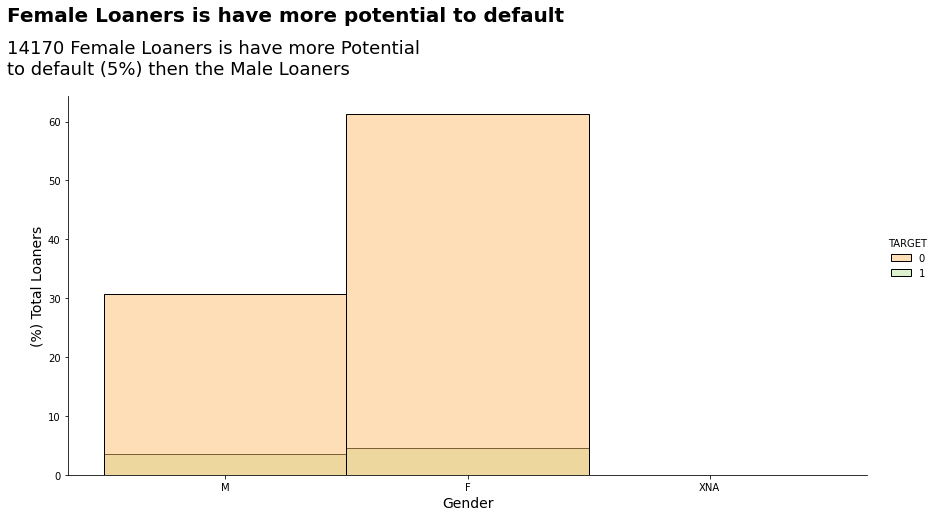

In [61]:
sns.displot(x='CODE_GENDER', hue='TARGET', data=df_1, palette='Spectral', stat = 'percent', height=6, aspect=2)

plt.text(x= -0.9, y=77, s="Female Loaners is have more potential to default", 
         fontsize=20, fontweight='bold')
plt.text(x= -0.9, y=68, s="14170 Female Loaners is have more Potential \nto default (5%) then the Male Loaners", 
         fontsize=18)

plt.xlabel('Gender', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)

### Is the city where they lived the same as the workplace?

In [62]:
df_1['REG_CITY_NOT_WORK_CITY'].value_counts()

0    236644
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

In [63]:
df_12grouped = df_1.groupby(['REG_CITY_NOT_WORK_CITY','TARGET']).agg({'SK_ID_CURR' : ['nunique']})
df_12grouped = df_12grouped.reset_index()
df_12grouped.columns = ['CITY = WORK','TARGET STATUS','TOTAL LOANERS']
df_12grouped['RATIO'] = (df_12grouped['TOTAL LOANERS'])/len(df_1)*100
df_12grouped['RATIO ROUNDED'] = df_12grouped['RATIO'].apply(lambda x: round(x, decimals))
df_12grouped

,CITY = WORK,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,0,0,219339,71.327205,71.0
1,0,1,17305,5.627441,6.0
2,1,0,63347,20.599913,21.0
3,1,1,7520,2.445441,2.0


Text(11.888657407407415, 0.5, '(%) Total Loaners')

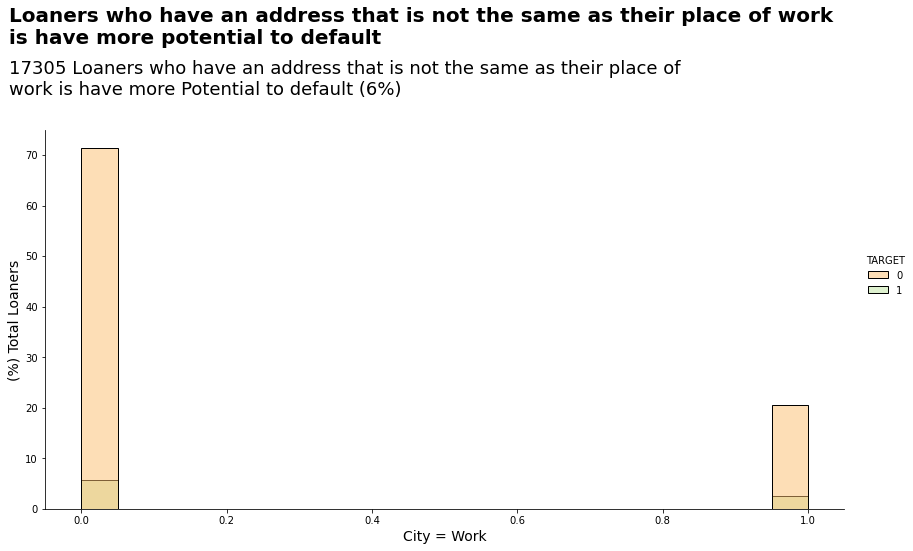

In [64]:
sns.displot(x='REG_CITY_NOT_WORK_CITY', hue='TARGET', data=df_1, palette='Spectral', stat = 'percent', height=6, aspect=2)

plt.text(x= -0.1, y=92, s="Loaners who have an address that is not the same as their place of work \nis have more potential to default", 
         fontsize=20, fontweight='bold')
plt.text(x= -0.1, y=82, s="17305 Loaners who have an address that is not the same as their place of \nwork is have more Potential to default (6%)", 
         fontsize=18)

plt.xlabel('City = Work', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)

## Data Celaning & Feature Selection

In [65]:
df_1.shape

(307511, 132)

In [66]:
df_1.info(verbose=True, null_counts=True)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_14284/2524743543.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_1.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 132 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### Drop Missing Value (69%)

In [67]:
def missing_values_table(df_1):
        # Total missing values
        mis_val = df_1.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * mis_val / len(df_1)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df_1.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [68]:
missing_values_train = missing_values_table(df_1)
missing_values_train.head(10)

Your selected dataframe has 132 columns.
There are 68 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


In [69]:
df_1 = df_1.drop(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG'], axis = 1)

In [70]:
df_1.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [71]:
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_REGISTRATION,MONTH_REGISTRATION,DAY_REGISTRATION,AGE,AGE_CATEGORY,AMT_INCOME_CAT,DAYS_LAST_PHONE_CHANGE_FIXED,PHONE_CHANGE_CAT,DAYS_ID_PUBLISH_FIXED,DAYS_ID_PUBLISH_CAT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.00,0.0690,0.0833,0.1250,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.6341,0.0000,0.0690,0.0833,0.1250,0.0377,0.0198,0.0,0.0250,0.0369,0.9722,0.6243,0.00,0.0690,0.0833,0.1250,0.0375,0.0193,0.00,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2012,8,6,26.0,Twenty,High Income,3.0,Ever,6.0,Ever Changed
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.08,0.0345,0.2917,0.3333,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.8040,0.0806,0.0345,0.2917,0.3333,0.0128,0.0554,0.0,0.0968,0.0529,0.9851,0.7987,0.08,0.0345,0.2917,0.3333,0.0132,0.0558,0.01,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,4,47.0,Fourty,High Income,2.0,Ever,1.0,Ever Changed
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,

### Input Missing Value (Using Simple Imputer)

In [72]:
nums = [key for key in dict(df_1.dtypes) if dict(df_1.dtypes)[key] in ['float64', 'int64']]
cats = [key for key in dict(df_1.dtypes) if dict(df_1.dtypes)[key] in ['object']]

In [73]:
#create two DataFrames, one for each data type
data_numeric = df_1[nums]
data_categorical = pd.DataFrame(df_1[cats])


from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median', verbose=0)
data_numeric = pd.DataFrame(imp.fit_transform(data_numeric), columns = data_numeric.columns) #only apply imputer to numeric columns

cimp = SimpleImputer(missing_values=np.nan, strategy='most_frequent', verbose=0)
data_categorical = pd.DataFrame(cimp.fit_transform(data_categorical), columns = data_categorical.columns) #only apply imputer to numeric columns


#you could do something like one-hot-encoding of data_categorical here

#join the two masked dataframes back together
df_1 = pd.concat([data_numeric, data_categorical], axis = 1)

In [74]:
df_1.isna().sum()

SK_ID_CURR                      0
TARGET                          0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
EXT_SOURCE_1  

### Feature Encoding

In [75]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.preprocessing import LabelEncoder
from numpy import array 

In [76]:
df_for_model = df_1

In [77]:
cats_le = df_for_model[['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
                        'FLAG_OWN_REALTY','EMERGENCYSTATE_MODE',
                        'NAME_EDUCATION_TYPE','AMT_INCOME_CAT',
                        'DAYS_ID_PUBLISH_CAT', 'PHONE_CHANGE_CAT']]
cats_ohe = df_for_model[['NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                         'NAME_FAMILY_STATUS','OCCUPATION_TYPE',
                         'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE',
                         'WALLSMATERIAL_MODE','HOUSETYPE_MODE',
                         'AGE_CATEGORY','NAME_HOUSING_TYPE']]

In [78]:
for i in cats_le:
    df_for_model[i]= LabelEncoder().fit_transform(df_for_model[i])
for cat in cats_ohe:
    onehots = pd.get_dummies(df_for_model[cat], prefix=cat)
    df_for_model = df_for_model.join(onehots)

In [79]:
df_for_model.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 247 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    SK_ID_CURR                                float64
 1    TARGET                                    float64
 2    CNT_CHILDREN                              float64
 3    AMT_INCOME_TOTAL                          float64
 4    AMT_CREDIT                                float64
 5    AMT_ANNUITY                               float64
 6    AMT_GOODS_PRICE                           float64
 7    REGION_POPULATION_RELATIVE                float64
 8    DAYS_BIRTH                                float64
 9    DAYS_EMPLOYED                             float64
 10   DAYS_REGISTRATION                         float64
 11   DAYS_ID_PUBLISH                           float64
 12   OWN_CAR_AGE                               float64
 13   FLAG_MOBIL                                

In [80]:
df_for_model = df_for_model.drop(['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','AGE_CATEGORY','NAME_HOUSING_TYPE'], axis=1)

In [81]:
df_for_model.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 237 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    SK_ID_CURR                                float64
 1    TARGET                                    float64
 2    CNT_CHILDREN                              float64
 3    AMT_INCOME_TOTAL                          float64
 4    AMT_CREDIT                                float64
 5    AMT_ANNUITY                               float64
 6    AMT_GOODS_PRICE                           float64
 7    REGION_POPULATION_RELATIVE                float64
 8    DAYS_BIRTH                                float64
 9    DAYS_EMPLOYED                             float64
 10   DAYS_REGISTRATION                         float64
 11   DAYS_ID_PUBLISH                           float64
 12   OWN_CAR_AGE                               float64
 13   FLAG_MOBIL                                

### Feature Selection Using SelectKBest

In [82]:
x_k = df_for_model[[col for col in df_for_model.columns if col not in ['TARGET']]]
y_k = df_for_model['TARGET']
 
print("Feature data dimension: ", x_k.shape) 

Feature data dimension:  (307511, 236)


In [83]:
select = SelectKBest(score_func=f_regression, k=15)
z = select.fit_transform(x_k, y_k) 
 
print("After selecting best 15 features:", z.shape) 

After selecting best 15 features: (307511, 15)


In [84]:
filter = select.get_support()
features = array(x_k.columns)
 
print("All features:")
print(' ')
print(features)
print(' ')
print(' ')
print("Selected best 15:")
print(' ')
print(features[filter])
print(z) 

All features:
 
['SK_ID_CURR' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT' 'AMT_ANNUITY'
 'AMT_GOODS_PRICE' 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH'
 'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE'
 'FLAG_MOBIL' 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE'
 'FLAG_PHONE' 'FLAG_EMAIL' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'HOUR_APPR_PROCESS_START'
 'REG_REGION_NOT_LIVE_REGION' 'REG_REGION_NOT_WORK_REGION'
 'LIVE_REGION_NOT_WORK_REGION' 'REG_CITY_NOT_LIVE_CITY'
 'REG_CITY_NOT_WORK_CITY' 'LIVE_CITY_NOT_WORK_CITY' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'ELEVATORS_AVG'
 'ENTRANCES_AVG' 'FLOORSMAX_AVG' 'FLOORSMIN_AVG' 'LANDAREA_AVG'
 'LIVINGAREA_AVG' 'NONLIVINGAREA_AVG' 'APARTMENTS_MODE'
 'BASEMENTAREA_MODE' 'YEARS_BEGINEXPLUATATION_MODE' 'YEARS_BUILD_MODE'
 'ELEVATORS_MODE' 'ENTRANCES_MODE' 'FLOORSMAX_MODE' 'FLOORSMIN_MODE'
 'LANDAREA_M

### MinMaxScaler

In [85]:
numss = [['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEAR_REGISTRATION',
 'AGE']]

In [86]:
from sklearn.preprocessing import MinMaxScaler
for i in numss:
    df_for_model[i] = MinMaxScaler().fit_transform(df_for_model[i])

In [87]:
df_for_model.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_REGISTRATION,MONTH_REGISTRATION,DAY_REGISTRATION,...,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: typ

## Modeling

In [88]:
#import library for modelling
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from scipy import stats
from imblearn import over_sampling

In [89]:
X = df_for_model[['DAYS_BIRTH','DAYS_ID_PUBLISH','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_WORK_CITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE_Working']]
y = df_for_model['TARGET']
X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C:\Users\LENOVO\Documents\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [90]:
X.shape

(424029, 12)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))

    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred, zero_division=0))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train, zero_division=0))

    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred, zero_division=0))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train, zero_division=0))

    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred, zero_division=0))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train, zero_division=0))

    print('Test score:' + str(model.score(X_test, y_test))) #Test score
    print('Train score: ' + str(model.score(X_train, y_train))) #Train score
    
    print("AUC (Test Set): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (Train Set): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    conf_mat = confusion_matrix(y_test,y_pred)
    print(conf_mat)
    print('='*100)
    print()

In [92]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=42,)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [93]:
eval_classification(log_model)

Accuracy (Test Set): 0.71
Accuracy (Train Set): 0.71
Precision (Test Set): 0.61
Precision (Train Set): 0.61
Recall (Test Set): 0.36
Recall (Train Set): 0.35
F1-Score (Test Set): 0.45
F1-Score (Train Set): 0.45
Test score:0.7103742659717472
Train score: 0.710231790310626
AUC (Test Set): 0.73
AUC (Train Set): 0.73
[[75291  9485]
 [27358 15075]]



### Hyperparameter Tuning Log Reg

In [94]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters
penalty = ['l2','l1','elasticnet']
C = [0.00001,0.00002,0.00003,0.0001,0.0002,0.0003, 0.001, 0.002,0.003] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['lbfgs','liblinear','newton-cg','sag','saga']
# max_iter = [100, 1000,2500, 5000]
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres with Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=10, random_state=42, scoring='accuracy')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model)

C:\Users\LENOVO\Documents\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\Documents\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\Documents\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\Documents\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447

Accuracy (Test Set): 0.71
Accuracy (Train Set): 0.71
Precision (Test Set): 0.63
Precision (Train Set): 0.62
Recall (Test Set): 0.32
Recall (Train Set): 0.32
F1-Score (Test Set): 0.42
F1-Score (Train Set): 0.42
Test score:0.7096589077816822
Train score: 0.7089987197628193
AUC (Test Set): 0.73
AUC (Train Set): 0.73
[[76670  8106]
 [28828 13605]]



In [95]:
print('Best penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 0.002


### Feature Importance

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_14284/1259463102.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(importances['Attribute'], y=importances['Attribute'])


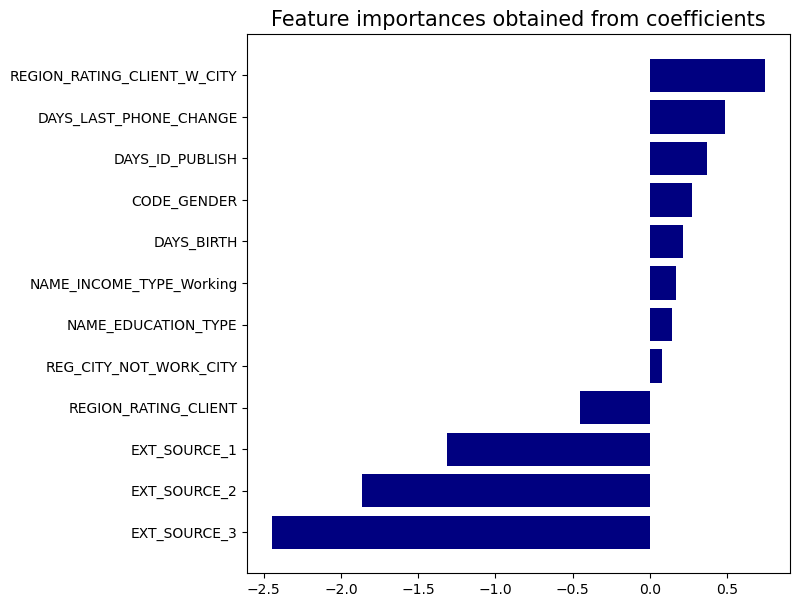

In [96]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': log_model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(7,7))

plt.title('Feature importances obtained from coefficients', size=15)

ax.barh(importances['Attribute'], importances['Importance'], align='center',color='navy')
ax.set_yticklabels(importances['Attribute'], y=importances['Attribute'])
ax.invert_yaxis()
plt.show()

### AUC & KS

In [97]:
y_pred_proba1 = model.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba1, columns=['y_pred_proba1'])], axis=1)
df_actual_predicted.index = y_test.index

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score

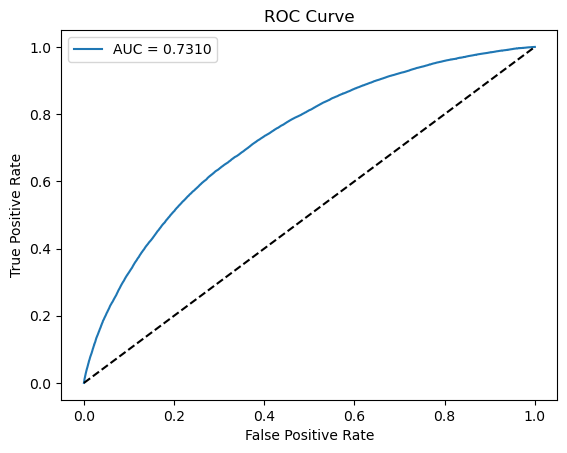

In [99]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba1'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba1'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [100]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba1')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.3382')

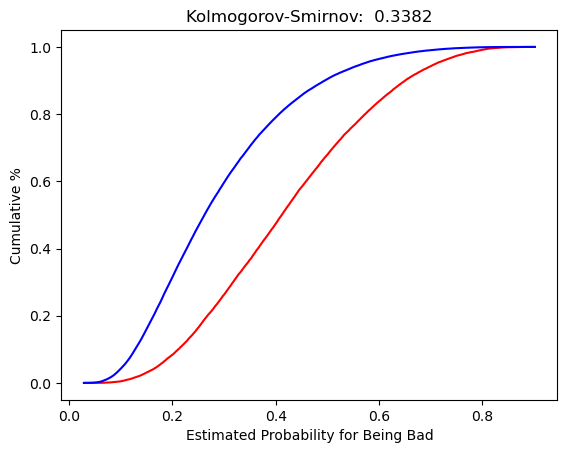

In [101]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba1'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba1'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

## Submitting Predictions on Test Dataset

In [102]:
test_data = pd.read_csv('application_test.csv')

In [103]:
test_data.shape

(48744, 121)

### Feature Engineer

In [104]:
test_data['DATE_REGISTRATION'] = pd.to_datetime("today") + pd.to_timedelta(test_data['DAYS_REGISTRATION'], unit = 'D')
test_data['YEAR_REGISTRATION'] = pd.DatetimeIndex(test_data['DATE_REGISTRATION']).year
test_data['MONTH_REGISTRATION'] = pd.DatetimeIndex(test_data['DATE_REGISTRATION']).month
test_data['DAY_REGISTRATION']= pd.DatetimeIndex(test_data['DATE_REGISTRATION']).day

In [105]:
test_data = test_data.drop(['DATE_REGISTRATION'], axis = 1)

In [106]:
test_data['AGE'] = test_data['DAYS_BIRTH']/-360
decimals = 0
test_data['AGE'] = test_data['AGE'].apply(lambda x: round(x, decimals))

In [107]:
def age_category(age):
    if age < 20:
        return 'Late Ten'
    elif age >= 20 and age < 30:
        return 'Twenty'
    elif age >= 30 and age < 40:
        return 'Thirty'
    elif age >= 40 and age < 50:
        return 'Fourty'
    elif age >= 50 and age < 60:
        return 'Fifty'
    else:
        return 'Above Sixty'

test_data['AGE_CATEGORY'] = test_data['AGE'].apply(age_category)

In [108]:
def income_category(income):
    if income < 112500:
        return 'Low Income'
    elif income >= 112500 and income < 202500:
        return 'Mid Income'
    else:
        return 'High Income'

test_data['AMT_INCOME_CAT'] = test_data['AMT_INCOME_TOTAL'].apply(income_category)

### Applying Preparation and Submision

In [109]:
def missing_values_table(test_data):
        # Total missing values
        mis_val = test_data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * mis_val / len(test_data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(test_data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [110]:
missing_values_train = missing_values_table(test_data)
missing_values_train.head(10)

Your selected dataframe has 127 columns.
There are 64 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


In [111]:
test_data = test_data.drop(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG'], axis = 1)

In [112]:
nums2 = [key for key in dict(test_data.dtypes) if dict(test_data.dtypes)[key] in ['float64', 'int64']]
cats2 = [key for key in dict(test_data.dtypes) if dict(test_data.dtypes)[key] in ['object']]

In [113]:
#create two DataFrames, one for each data type
data_numeric = test_data[nums2]
data_categorical = pd.DataFrame(test_data[cats2])


from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median', verbose=0)
data_numeric = pd.DataFrame(imp.fit_transform(data_numeric), columns = data_numeric.columns) #only apply imputer to numeric columns

cimp = SimpleImputer(missing_values=np.nan, strategy='most_frequent', verbose=0)
data_categorical = pd.DataFrame(cimp.fit_transform(data_categorical), columns = data_categorical.columns) #only apply imputer to numeric columns


#you could do something like one-hot-encoding of data_categorical here

#join the two masked dataframes back together
test_data = pd.concat([data_numeric, data_categorical], axis = 1)

In [114]:
test_data.isna().sum()

SK_ID_CURR                      0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
EXT_SOURCE_1                    0
EXT_SOURCE_2  

In [115]:
test_model = test_data

In [116]:
cats_le2 = test_model[['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','EMERGENCYSTATE_MODE','NAME_EDUCATION_TYPE','AMT_INCOME_CAT']]
cats_ohe2 = test_model[['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','AGE_CATEGORY','NAME_HOUSING_TYPE']]

In [117]:
for i in cats_le2:
    test_model[i]= LabelEncoder().fit_transform(test_model[i])
for cat in cats_ohe2:
    onehots = pd.get_dummies(test_model[cat], prefix=cat)
    test_model = test_model.join(onehots)

In [118]:
test_model.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 240 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    SK_ID_CURR                                float64
 1    CNT_CHILDREN                              float64
 2    AMT_INCOME_TOTAL                          float64
 3    AMT_CREDIT                                float64
 4    AMT_ANNUITY                               float64
 5    AMT_GOODS_PRICE                           float64
 6    REGION_POPULATION_RELATIVE                float64
 7    DAYS_BIRTH                                float64
 8    DAYS_EMPLOYED                             float64
 9    DAYS_REGISTRATION                         float64
 10   DAYS_ID_PUBLISH                           float64
 11   OWN_CAR_AGE                               float64
 12   FLAG_MOBIL                                float64
 13   FLAG_EMP_PHONE                            fl

In [119]:
test_model = test_model.drop(['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','AGE_CATEGORY','NAME_HOUSING_TYPE'], axis=1)

In [120]:
numss2 = [['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEAR_REGISTRATION',
 'AGE']]

In [121]:
from sklearn.preprocessing import MinMaxScaler
for i in numss2:
    test_model[i] = MinMaxScaler().fit_transform(test_model[i])

In [122]:
X1 = test_model[['DAYS_BIRTH','DAYS_ID_PUBLISH','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_WORK_CITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE_Working']]

In [123]:
X1

,DAYS_BIRTH,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE_Working
0,0.333427,0.872086,0.5,0.75,0.0,0.798495,0.923572,0.180263,0.601009,0,1,1
1,0.399339,0.744329,0.5,0.75,0.0,0.595809,0.341111,0.490287,1.000000,1,4,1
2,0.288794,0.448173,0.5,0.75,0.0,0.532916,0.818463,0.692134,0.803715,1,1,1
3,0.628269,0.337114,0.5,0.75,0.0,0.553401,0.596110,0.694076,0.586104,0,4,1
4,0.680685,0.328607,0.5,0.75,1.0,0.203835,0.497875,0.587946,0.811740,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.292602,0.464556,1.0,1.00,0.0,0.532916,0.758565,0.728454,0.843155,0,4,1
48740,0.784510,0.526938,0.5,0.75,1.0,0.532916,0.800695,0.587946,1.000000,0,4,0
48741,0.519292,0.763075,0.5,0.75,0.0,0.777850,0.740079,0.321070,0.807842,0,4,0
48742,0.628717,0.785129,0.5,0.75,1.0,0.388503,0.521283,0.674520,0.470764,1,1,0


In [124]:
TARGET = pd.Series(model.predict(X1), name="Target")

In [125]:
ID = test_data['SK_ID_CURR']
submission_df_test = pd.concat([ID, TARGET], axis=1)

In [126]:
submission_df_test

,SK_ID_CURR,Target
0,100001.0,0.0
1,100005.0,1.0
2,100013.0,0.0
3,100028.0,0.0
4,100038.0,0.0
...,...,...
48739,456221.0,0.0
48740,456222.0,0.0
48741,456223.0,0.0
48742,456224.0,0.0


Text(-1.4, 1.15, 'We can reduce 11,61% potential \nto default')

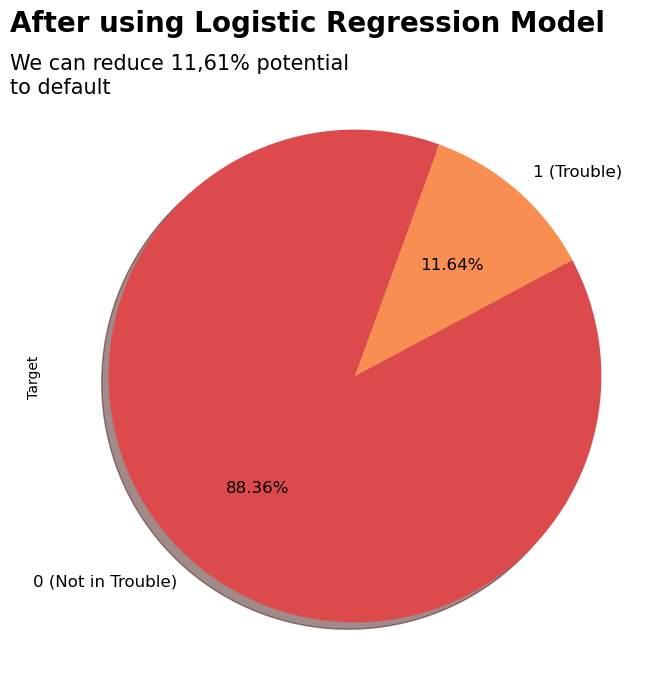

In [127]:
plt.figure(figsize=(16,8))

colors = sns.color_palette("Spectral", 7)
labels ="0 (Not in Trouble)", "1 (Trouble)"

submission_df_test["Target"].value_counts().plot.pie(autopct='%1.2f%%', shadow=True,labels = labels ,colors=colors, fontsize=12, startangle=70)

plt.text(x=-1.4, y=1.4, s="After using Logistic Regression Model", 
         fontsize=20, fontweight='bold')
plt.text(x=-1.4, y=1.15, s="We can reduce 11,61% potential \nto default", 
         fontsize=15)

In [128]:
#Submission
submission_df_test.to_csv('submissions_hci_datatest.csv',index=False)

Before and After using model:
Before we use the model, we know that
8,07 % of Customers indicated
failure from data train.
We can predict that
11.61 % of the Test Data will default based on our
modeling. As a result, customers who are expected to fail to pay can have
their applications canceled